<font color='black'><font size="5"> AIM OF THIS ANALYSIS IS TO UNDERSTAND WHICH PROVINCES IN ITALY ARE SHOWING HIGHER NUMBER OF CAR ACCIDENTS, INJURED AND DEATHS IN THE LAST 10 YEARS WHEN POPULATION, NUMBER OF VEHICLES AND LENGTH OF ROAD NETWORK ARE TAKEN INTO ACCOUNT    </font>
***
    
DATA ARE OPEN AND PROVIDED BY ISTAT EVEN IF IT WAS NECESSARY SOME PRELIMINARY ACTIVITIES DUE TO CHANGES IN PROVINCES IN THE LAST YEARS. LENGTH OF ROAD NETWORK AND KM OF RESIDENTIAL AREAS FOR EACH PROVINCE ARE ALREADY COMPUTED BY ISTAT USING OPEN STREET MAP
    


<font color='blue'><font size="3">DATA EXPLORATION</font>
***

In [47]:
# Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import pandas_log
import dtale
from kneed import KneeLocator
from sklearn.decomposition import PCA
import plotly.express as px
import matplotlib.font_manager

In [48]:
# Importing input file
ISTAT_car_acc = pd.read_excel('Car_Accidents_ISTAT.xlsx',sheet_name='Input dataset')

In [49]:
# Visualizing dataset
ISTAT_car_acc

,Anno,Provincia,Incidenti,Feriti,Morti,Veicoli per 1000 abitanti,Veicoli per 100 km,Km per 1000 abitanti,Percentuale di superficie abitativa
0,2011,Agrigento,701,1195,17,837.592665,3534.791493,23.695674,3.549157
1,2011,Alessandria,1700,2377,45,878.401436,2483.149738,35.374485,4.846307
2,2011,Ancona,2045,3056,33,852.646143,4007.932947,21.273962,7.868110
3,2011,Arezzo,1337,1884,33,901.043633,2772.152502,32.503393,3.900663
4,2011,Ascoli Piceno,1009,1368,8,890.766293,2994.986568,29.741913,4.408860
...,...,...,...,...,...,...,...,...,...
1065,2020,Vercelli,243,344,10,875.848345,2791.591239,31.374520,3.920339
1066,2020,Verona,2057,2635,46,851.467679,4258.925791,19.992546,12.463397
1067,2020,Vibo Valentia,145,241,2,821.852629,2607.311585,31.521075,6.818223
1068,2020,Vicenza,1660,2114,37,841.954867,4024.273114,20.921912,13.986439


In [50]:
# For ease of use, let's convert blank space in column names with more friendly '_'
ISTAT_car_acc.columns = ISTAT_car_acc.columns.str.replace(' ','_')

In [51]:
# Let's display dimensions of dataset
ISTAT_car_acc.shape
# we are working with 1k rows and 9 fields

(1070, 9)

In [52]:
# Let's display data types
ISTAT_car_acc.info()
# Data types have been recognized by Python so we can go ahed with our analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Anno                                 1070 non-null   int64  
 1   Provincia                            1070 non-null   object 
 2   Incidenti                            1070 non-null   int64  
 3   Feriti                               1070 non-null   int64  
 4   Morti                                1070 non-null   int64  
 5   Veicoli_per_1000_abitanti            1070 non-null   float64
 6   Veicoli_per_100_km                   1070 non-null   float64
 7   Km_per_1000_abitanti                 1070 non-null   float64
 8   Percentuale_di_superficie_abitativa  1070 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 75.4+ KB


In [53]:
# Let's check if there are missing data
ISTAT_car_acc.isnull().sum()
# We do not have missing data points

Anno                                   0
Provincia                              0
Incidenti                              0
Feriti                                 0
Morti                                  0
Veicoli_per_1000_abitanti              0
Veicoli_per_100_km                     0
Km_per_1000_abitanti                   0
Percentuale_di_superficie_abitativa    0
dtype: int64

In [54]:
# Let's diplay some fundamental stats
ISTAT_car_acc.describe()

,Anno,Incidenti,Feriti,Morti,Veicoli_per_1000_abitanti,Veicoli_per_100_km,Km_per_1000_abitanti,Percentuale_di_superficie_abitativa
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,2015.500000,1626.966355,2293.942991,31.201869,849.297087,3844.140052,27.041949,8.278278
std,2.873624,2233.477588,3007.973326,28.353977,111.421256,2180.749882,11.399502,8.020543
min,2011.000000,115.000000,161.000000,0.000000,657.297043,1472.154393,4.443459,1.051938
25%,2013.000000,595.750000,896.750000,14.250000,800.602682,2603.533487,19.760817,3.662947
50%,2015.500000,1063.000000,1540.500000,24.000000,840.880514,3398.025321,26.090530,6.203237
75%,2018.000000,1705.500000,2385.500000,39.000000,881.963785,4169.819985,33.567571,9.458397
max,2020.000000,22169.000000,29957.000000,266.000000,1691.865735,16366.317210,67.189839,53.401421


In [55]:
# Sorting dataset for ease of use
ISTAT_car_acc.sort_values(by=['Provincia','Anno'], inplace=True)

In [56]:
# Putting field "Province" as dataset index
ISTAT_car_acc.set_index('Provincia',inplace=True)

<font color='blue'><font size="3">FEATURE ENGINEERING</font>
***

In [57]:
# An interesting value to add is percentage difference by province from one year to another in terms of car accidents, injured and deaths
# Let's calculate these new fields
New_features = ISTAT_car_acc[['Incidenti','Feriti','Morti']].pct_change()

In [58]:
# Let's rename columns 
New_features.rename(columns = {'Incidenti':'Inc_evo',
                               'Feriti':'Fer_evo',
                               'Morti':'Mor_evo'},
                    inplace = True)

In [59]:
# Let's display new features
New_features

,Inc_evo,Fer_evo,Mor_evo
Provincia,,,
Agrigento,NaN,NaN,NaN
Agrigento,-0.198288,-0.213389,-0.058824
Agrigento,-0.076512,-0.100000,0.187500
Agrigento,0.030829,0.059102,-0.526316
Agrigento,-0.177570,-0.203125,1.000000
...,...,...,...
Viterbo,-0.118911,-0.074510,-0.181818
Viterbo,-0.032520,-0.046610,0.666667
Viterbo,0.139496,0.122222,-0.366667


In [60]:
# Let's put new features within main dataset
ISTAT_car_acc=pd.concat([ISTAT_car_acc,New_features], axis=1)

In [61]:
# For each province we need to correct for borders because we cannot have values for 2011 being the first year of analysis
# Let's assign 0 to each indicator for 2011
ISTAT_car_acc.loc[ISTAT_car_acc.Anno == 2011, ['Inc_evo', 'Fer_evo','Mor_evo']] = 0,0,0

In [62]:
# We want also to calculate aggregated mean variations per province

# Let's remove 2011 to avoid affecting quality of indicators
Agg_stats=ISTAT_car_acc[ISTAT_car_acc.Anno != 2011]

# Let's calculate aggregated stats
Agg_stats=Agg_stats.groupby(['Provincia']).agg(Avg_inc_evo=('Inc_evo','mean'),
                                                                 Avg_fer_evo=('Fer_evo','mean'),
                                                                 Avg_mor_evo=('Mor_evo','mean'))

In [63]:
# Let's display aggregated stats
Agg_stats

,Avg_inc_evo,Avg_fer_evo,Avg_mor_evo
Provincia,,,
Agrigento,-0.056197,-0.061381,0.148222
Alessandria,-0.068494,-0.072407,-0.043735
Ancona,-0.056198,-0.064995,-0.001952
Aosta,-0.034375,-0.026590,0.020307
Arezzo,-0.061994,-0.068240,-0.064930
...,...,...,...
Vercelli,-0.068189,-0.064094,0.051333
Verona,-0.041939,-0.047847,-0.013065
Vibo Valentia,-0.053032,-0.048554,0.120329


In [64]:
# Porting of aggregated stats by province in main dataset
ISTAT_car_acc=ISTAT_car_acc.join(Agg_stats, how='left')

<font color='blue'><font size="3">INSIGHTS ON TIME SERIES</font>
***

In [65]:
# Let's display dataset with new features
ISTAT_car_acc

,Anno,Incidenti,Feriti,Morti,Veicoli_per_1000_abitanti,Veicoli_per_100_km,Km_per_1000_abitanti,Percentuale_di_superficie_abitativa,Inc_evo,Fer_evo,Mor_evo,Avg_inc_evo,Avg_fer_evo,Avg_mor_evo
Provincia,,,,,,,,,,,,,,
Agrigento,2011,701,1195,17,837.592665,3534.791493,23.695674,3.549157,0.000000,0.000000,0.000000,-0.056197,-0.061381,0.148222
Agrigento,2012,562,940,16,837.592665,3534.791493,23.695674,3.549157,-0.198288,-0.213389,-0.058824,-0.056197,-0.061381,0.148222
Agrigento,2013,519,846,19,837.592665,3534.791493,23.695674,3.549157,-0.076512,-0.100000,0.187500,-0.056197,-0.061381,0.148222
Agrigento,2014,535,896,9,837.592665,3534.791493,23.695674,3.549157,0.030829,0.059102,-0.526316,-0.056197,-0.061381,0.148222
Agrigento,2015,440,714,18,837.592665,3534.791493,23.695674,3.549157,-0.177570,-0.203125,1.000000,-0.056197,-0.061381,0.148222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viterbo,2016,615,944,18,913.162052,3215.301001,28.400515,2.486274,-0.118911,-0.074510,-0.181818,-0.037218,-0.040753,-0.000679
Viterbo,2017,595,900,30,913.162052,3215.301001,28.400515,2.486274,-0.032520,-0.046610,0.666667,-0.037218,-0.040753,-0.000679
Viterbo,2018,678,1010,19,913.162052,3215.301001,28.400515,2.486274,0.139496,0.122222,-0.366667,-0.037218,-0.040753,-0.000679


In [66]:
# let's create a column based on index
ISTAT_car_acc['Province'] = ISTAT_car_acc.index

In [67]:
# Let's display evolution of incidents across ten years for each province
fig = px.line(ISTAT_car_acc, x="Anno", y="Inc_evo", color='Province')
fig.show()
# We can see very different trends across provinces

In [68]:
# Let's display less provinces. We will start displaying provinces with worst incident evolution across 10 years
# Isolating worst 10 provinces
Top10 = pd.DataFrame(ISTAT_car_acc.groupby(['Provincia']).agg(Valore=('Inc_evo','mean')).sort_values(by='Valore',ascending=False).head(10)) 

In [69]:
# Let's display worst 10 provinces
fig = px.line(ISTAT_car_acc.join(Top10,
                                 how='inner'),
              x="Anno", 
              y="Inc_evo", 
              color='Province')
fig.show()
# We can see car accidents have decreased even for these provinces, especially in the last 2 years
# It seems interesting the huge spike in 2019 for Oristano

In [70]:
# Isolating best 10 provinces
Bottom10 = pd.DataFrame(ISTAT_car_acc.groupby(['Provincia']).agg(Valore=('Inc_evo','mean')).sort_values(by='Valore',ascending=True).head(10)) 

In [71]:
# Let's display best 10 provinces
fig = px.line(ISTAT_car_acc.join(Bottom10,
                                 how='inner'),
              x="Anno", 
              y="Inc_evo", 
              color='Province')
fig.show()
# Even in this case trend is stable from 2011 to 2019 and then there is a sudden decrease for all provinces in 2020

In [72]:
# Let's display evolution of deaths across ten years for each province
fig = px.line(ISTAT_car_acc, x="Anno", y="Mor_evo", color='Province')
fig.show()
# We can see a very huge spike here for Enna and Avellino in 2013

In [73]:
# Let's display less provinces. We will start displaying provinces with worst incident evolution across 10 years
# Isolating worst 10 provinces
Top10 = pd.DataFrame(ISTAT_car_acc.groupby(['Provincia']).agg(Valore=('Mor_evo','mean')).sort_values(by='Valore',ascending=False).head(10)) 

In [74]:
# Let's display worst 10 provinces
fig = px.line(ISTAT_car_acc.join(Top10,
                                 how='inner'),
              x="Anno", 
              y="Mor_evo", 
              color='Province')
fig.show()

In [75]:
# Isolating best 10 provinces
Bottom10 = pd.DataFrame(ISTAT_car_acc.groupby(['Provincia']).agg(Valore=('Mor_evo','mean')).sort_values(by='Valore',ascending=True).head(10)) 

In [76]:
# Let's display best 10 provinces
fig = px.line(ISTAT_car_acc.join(Bottom10,
                                 how='inner'),
              x="Anno", 
              y="Mor_evo", 
              color='Province')
fig.show()
# Even in this case trend is stable from 2011 to 2019 and then there is a sudden decrease for all provinces in 2020

<font color='blue'><font size="3">INSIGHTS ON DATA AGGREGATED BY PROVINCE</font>
***

In [77]:
# Let's aggregate data
ISTAT_agg=ISTAT_car_acc.groupby(['Provincia']).agg(Tot_acc=('Incidenti','sum'),
                                                    Tot_inj=('Feriti','sum'),
                                                    Tot_dea=('Morti','sum'), 
                                                   Veh_pop=('Veicoli_per_1000_abitanti','mean'),
                                                   Veh_roads=('Veicoli_per_100_km','mean'),
                                                   roads_pop=('Km_per_1000_abitanti','mean'),
                                                   km_res_area=('Percentuale_di_superficie_abitativa','mean'),
                                                   Avg_inc_evo=('Avg_inc_evo','mean'),
                                                   Avg_fer_evo=('Avg_fer_evo','mean'),
                                                   Avg_mor_evo=('Avg_mor_evo','mean'))

# For ease of use let's put index as a column
ISTAT_agg['Province'] = ISTAT_agg.index

In [78]:
# Let's display data aggregated by province
ISTAT_agg

,Tot_acc,Tot_inj,Tot_dea,Veh_pop,Veh_roads,roads_pop,km_res_area,Avg_inc_evo,Avg_fer_evo,Avg_mor_evo,Province
Provincia,,,,,,,,,,,
Agrigento,5015,8157,142,837.592665,3534.791493,23.695674,3.549157,-0.056197,-0.061381,0.148222,Agrigento
Alessandria,13575,18908,323,878.401436,2483.149738,35.374485,4.846307,-0.068494,-0.072407,-0.043735,Alessandria
Ancona,16565,24317,277,852.646143,4007.932947,21.273962,7.868110,-0.056198,-0.064995,-0.001952,Ancona
Aosta,2802,3908,74,1691.865735,3771.809975,44.855540,1.702444,-0.034375,-0.026590,0.020307,Aosta
Arezzo,10888,15364,258,901.043633,2772.152502,32.503393,3.900663,-0.061994,-0.068240,-0.064930,Arezzo
...,...,...,...,...,...,...,...,...,...,...,...
Vercelli,4011,5601,177,875.848345,2791.591239,31.374520,3.920339,-0.068189,-0.064094,0.051333,Vercelli
Verona,29445,39337,639,851.467679,4258.925791,19.992546,12.463397,-0.041939,-0.047847,-0.013065,Verona
Vibo Valentia,1949,3163,80,821.852629,2607.311585,31.521075,6.818223,-0.053032,-0.048554,0.120329,Vibo Valentia


In [79]:
# Let's analyze the ratio between vehicles and population by province
fig = px.violin(ISTAT_agg, y="Veh_pop",points='all', hover_name='Province')
fig.show()
# We can see the great majority of provinces have 800-1000 vehicles per 1.000 inhabitants (almost every person owns a vehicle)
# Nevertheless there are some outliers like Aosta where each person has almost 2 vehicles
# Foggia, Venezia and Trani are provinces where there is about 1 vehicle every two persons

In [80]:
# Let's analyze the ratio between vehicles and road network in km
fig = px.violin(ISTAT_agg, y="Veh_roads",points='all', hover_name='Province')
fig.show()
# We can see that Napoli, Milano, Roma and Monza do have a great number of vehicles when road network is taken into account
# It is not a case that these cities do have very traffic roads
# Provinces like Nuoro, Oristano and Campobasso are on the other side of medal

In [81]:
# Let's analyze the ratio between road network in km and population
fig = px.violin(ISTAT_agg, y="roads_pop",points='all', hover_name='Province')
fig.show()
# Here we can see Isernia, Nuoro and Campobasso have a big road network despite small population
# That's probably why these provinces appear as outliers in previous chart

In [82]:
# Let's analyze evolution of number of accidents
fig = px.violin(ISTAT_agg, y="Avg_inc_evo",points='all', hover_name='Province')
fig.show()
# We can see that provinces like Rome, Cagliari and Siena have seen most significant decrease
# Sud Sardegna, Crotone and Bolzano the worst increase

In [83]:
# Let's analyze evolution of injured people
fig = px.violin(ISTAT_agg, y="Avg_fer_evo",points='all', hover_name='Province')
fig.show()

In [84]:
# Let's analyze evolution of deaths due to car accidents
fig = px.violin(ISTAT_agg, y="Avg_mor_evo",points='all', hover_name='Province')
fig.show()
# Enna and Avellino are outliers due to high growth in deaths

<font color='blue'><font size="3">NEW INDICATORS AND SYNTHETIC SCORE</font>
***

In [85]:
# Let's compute some interesting indicators here

# Total deaths/Accidents
ISTAT_agg['dea_on_acc']=ISTAT_agg['Tot_dea']/ISTAT_agg['Tot_acc']
# Total injured/Accidents 
ISTAT_agg['inj_on_acc']=ISTAT_agg['Tot_inj']/ISTAT_agg['Tot_acc']

# Total accidents/Vehicles per 1.000 inhabitants
ISTAT_agg['acc_on_veh_pop']=ISTAT_agg['Tot_acc']/ISTAT_agg['Veh_pop']
# Total injured/Vehicles per 1.000 inhabitants
ISTAT_agg['inj_on_veh_pop']=ISTAT_agg['Tot_inj']/ISTAT_agg['Veh_pop']
# Total deaths/Vehicles per 1.000 inhabitants
ISTAT_agg['dea_on_veh_pop']=ISTAT_agg['Tot_dea']/ISTAT_agg['Veh_pop']

# Total accidents/Vechicles per 100 km of road network
ISTAT_agg['acc_on_veh_rn']=ISTAT_agg['Tot_acc']/ISTAT_agg['Veh_roads']
# Total injured/Vechicles per 100 km of road network
ISTAT_agg['inj_on_veh_rn']=ISTAT_agg['Tot_inj']/ISTAT_agg['Veh_roads']
# Total deaths/Vechicles per 100 km of road network
ISTAT_agg['dea_on_veh_rn']=ISTAT_agg['Tot_dea']/ISTAT_agg['Veh_roads']

# Total accidents/road network lenght per 1.000 inahbitants
ISTAT_agg['acc_on_rn_pop']=ISTAT_agg['Tot_acc']/ISTAT_agg['roads_pop']
# Total injured/road network lenght per 1.000 inahbitants
ISTAT_agg['inj_on_rn_pop']=ISTAT_agg['Tot_inj']/ISTAT_agg['roads_pop']
# Total deaths/road network lenght per 1.000 inahbitants
ISTAT_agg['dea_on_rn_pop']=ISTAT_agg['Tot_dea']/ISTAT_agg['roads_pop']

# Total accidents/km of residential area
ISTAT_agg['acc_on_res_area']=ISTAT_agg['Tot_acc']/ISTAT_agg['km_res_area']
# Total injured/km of residential area
ISTAT_agg['inj_on_res_area']=ISTAT_agg['Tot_inj']/ISTAT_agg['km_res_area']
# Total deaths/km of residential area
ISTAT_agg['dea_on_res_area']=ISTAT_agg['Tot_dea']/ISTAT_agg['km_res_area']

In [86]:
# Let's create a dataset including only our 17 indicators
Indicators=ISTAT_agg[['dea_on_acc',
            'inj_on_acc',
            'acc_on_veh_pop',
            'inj_on_veh_pop',
            'dea_on_veh_pop',
            'acc_on_veh_rn',
            'inj_on_veh_rn',
            'dea_on_veh_rn',
            'acc_on_rn_pop',
            'inj_on_rn_pop',
            'dea_on_rn_pop',
            'acc_on_res_area',
            'inj_on_res_area',
            'dea_on_res_area',
            'Avg_inc_evo',
            'Avg_fer_evo',
            'Avg_mor_evo']]

<AxesSubplot:>

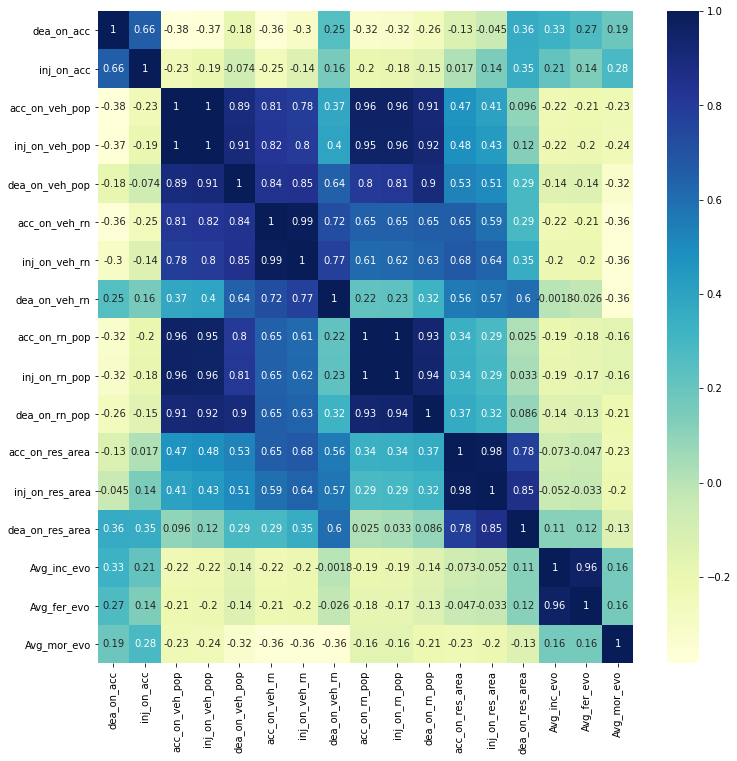

In [87]:
# Plotting correlation between indicators
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,12))     
sns.heatmap(Indicators.corr(), annot=True, ax=ax,cmap="YlGnBu")
# We can very high correlated features such as 'acc_on_veh_pop' with 'acc_on_rn_pop'

In [92]:
# Let's normalize all indicators to compute a synthetic score
from sklearn.preprocessing import StandardScaler
Indicators_norm = pd.DataFrame(StandardScaler().fit_transform(Indicators)) 

# Applying index again
Indicators_norm.set_index(Indicators.index,inplace=True)

In [107]:
# Computing synthetic score
Synthetic_score= pd.DataFrame(Indicators_norm.mean(axis=1)) 

# Renaming column
Synthetic_score.rename(columns={0:'Synthetic_score'}, inplace=True)

# Index as column
Synthetic_score['Provincia']=Synthetic_score.index


In [109]:
# Visualizing synthetic score
fig = px.violin(Synthetic_score, y="Synthetic_score",points='all', hover_name='Provincia')
fig.show()
# Using a single score we can see a lot of provinces are now grouped with only few outliers
# Rome, Milan and Foggia are showing very high synthtetic score
# Biella, Prato and Verbania very low scores